In [4]:
import numpy as np
import pandas as pd
import seaborn as sb
from sklearn import linear_model

In [5]:
dataset = pd.read_csv("resultado.csv", sep=";")

In [6]:
datset_sin_nulos = dataset.dropna()

In [7]:
datset_sin_nulos.shape

(45091, 21)

In [8]:
datset_sin_nulos.head()

,Unnamed: 0,edad,job,marital,education,default,balance,housing,loan,contact,...,month,year,child,no.hijos,duration,campaign,pdays,previous,poutcome,y
0,0,58.0,management,married,tertiary,No,2143.0,yes,no,unknown,...,may,2009,yes,1,261.0,1,-1.0,0,unknown,no
1,1,44.0,technician,single,secondary,No,29.0,yes,no,unknown,...,may,2009,yes,3,151.0,1,-1.0,0,unknown,no
2,2,33.0,entrepreneur,married,secondary,No,2.0,yes,yes,unknown,...,may,2012,no,0,76.0,1,-1.0,0,unknown,no
3,3,47.0,blue-collar,married,unknown,No,1506.0,yes,no,unknown,...,may,2013,no,0,92.0,1,-1.0,0,unknown,no
4,4,33.0,unknown,single,unknown,No,1.0,no,no,unknown,...,may,2011,yes,3,198.0,1,-1.0,0,unknown,no


In [9]:
#vector columna -- .values convierte en array
y = datset_sin_nulos.loc[:, "no.hijos"].values

In [10]:
#DataFrame
X=datset_sin_nulos[["edad"]].values

In [11]:
regresion_lineal = linear_model.LinearRegression()

In [12]:
regresion_lineal.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [13]:
regresion_lineal.coef_

array([-0.00036751])

In [14]:
regresion_lineal.intercept_

1.2698842033723696

In [15]:
regresion_lineal.predict([[0]])

array([1.2698842])

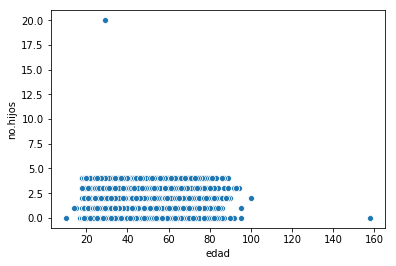

In [16]:
sb.scatterplot(data=datset_sin_nulos, x="edad", y="no.hijos")

In [17]:
dataset_edad_hijos_validos = datset_sin_nulos.loc[
  (datset_sin_nulos.edad < 140) & (datset_sin_nulos.loc[:, "no.hijos"].values<10), :]


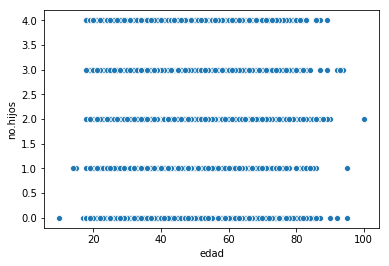

In [18]:
sb.scatterplot(data=dataset_edad_hijos_validos, x="edad", y="no.hijos")

In [19]:
y = dataset_edad_hijos_validos.loc[:, "no.hijos"].values

In [20]:
X=dataset_edad_hijos_validos[["edad"]].values

In [21]:
regresion_lineal_2= linear_model.LinearRegression()

In [22]:
regresion_lineal_2.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [23]:
regresion_lineal_2.coef_

array([-0.00029565])

In [24]:
regresion_lineal_2.intercept_

1.2665540424978354

### Separar conjunto de entrenamiento y de pruebas

In [25]:
porcentaje_entrenamiento = 0.8

In [26]:
porcentaje_pruebas = 1- porcentaje_entrenamiento

In [27]:
fila_max_entrenamiento=round(dataset_edad_hijos_validos.shape[0]*porcentaje_entrenamiento)

In [28]:
train = dataset_edad_hijos_validos.loc[:fila_max_entrenamiento-1, :]
test = dataset_edad_hijos_validos.loc[fila_max_entrenamiento:,:]

In [29]:
train.shape[0] + test.shape[0]

45089

#### edad --> balance

In [30]:
from sklearn.metrics import mean_squared_error
import math

In [31]:
X_train = train[["edad"]].values
y_train = train.loc[:, "balance"].values

In [32]:
X_test = test[["edad"]].values
y_test = test.loc[:, "balance"].values

In [33]:
regresion_train = linear_model.LinearRegression()

In [34]:

regresion_train.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [35]:
y_pred = regresion_train.predict(X_test)

In [36]:
math.sqrt(mean_squared_error(y_pred, y_test))

3523.9889065110133

In [37]:
y_pred

array([1041.06539091, 1342.94203792, 1141.69093992, ..., 2072.47726819,
       1695.13145943, 1192.00371442])

#### edad + duracion --> balance

In [38]:
X_train2 = train[["edad", "duration"]].values
X_test2 = test[["edad", "duration"]].values

In [39]:
lr_edad_duracion = linear_model.LinearRegression()

In [40]:
lr_edad_duracion.fit(X_train2, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [41]:
y_pred2 = lr_edad_duracion.predict(X_test2)

In [42]:
math.sqrt(mean_squared_error(y_test,y_pred2))

3522.1860070498324

In [43]:
from sklearn.metrics import r2_score, mean_absolute_error

In [44]:
r2_score( y_test, y_pred)

0.005588093410566652

In [45]:
r2_score(y_test, y_pred2)

0.006605330482972627

In [46]:
mean_absolute_error(y_test, y_pred)

1580.56495101271

In [47]:
mean_absolute_error(y_test, y_pred2)

1579.0019868177812

In [48]:
dataset_edad_hijos_validos.head()

,Unnamed: 0,edad,job,marital,education,default,balance,housing,loan,contact,...,month,year,child,no.hijos,duration,campaign,pdays,previous,poutcome,y
0,0,58.0,management,married,tertiary,No,2143.0,yes,no,unknown,...,may,2009,yes,1,261.0,1,-1.0,0,unknown,no
1,1,44.0,technician,single,secondary,No,29.0,yes,no,unknown,...,may,2009,yes,3,151.0,1,-1.0,0,unknown,no
2,2,33.0,entrepreneur,married,secondary,No,2.0,yes,yes,unknown,...,may,2012,no,0,76.0,1,-1.0,0,unknown,no
3,3,47.0,blue-collar,married,unknown,No,1506.0,yes,no,unknown,...,may,2013,no,0,92.0,1,-1.0,0,unknown,no
4,4,33.0,unknown,single,unknown,No,1.0,no,no,unknown,...,may,2011,yes,3,198.0,1,-1.0,0,unknown,no


# Clasificacion
### Clase 10/05/2019  - Arboles de descision

In [ ]:
####Numero de hijos para personar que no tienen hijos
#dataset_edad_hijos_validos = datset_sin_nulos.loc[
  #(datset_sin_nulos.edad < 140) & (datset_sin_nulos.loc[:, "no.hijos"].values<10), :]
    
    #columna_estado_civil= dataset.marital.apply(
    #lambda estado_civil: estado_civil.strip() if type(estado_civil)== str else estado_civil)

In [58]:
dataset_hijos_transformados = dataset_edad_hijos_validos.copy()
dataset_hijos_transformados.loc[
    (dataset_edad_hijos_validos.loc[:, "no.hijos"].values>0) & (dataset_edad_hijos_validos.child == "no"), :]

,Unnamed: 0,edad,job,marital,education,default,balance,housing,loan,contact,...,month,year,child,no.hijos,duration,campaign,pdays,previous,poutcome,y


In [63]:
dataset_edad_hijos_validos.loc[
    (dataset_edad_hijos_validos.loc[:, "no.hijos"].values>0) & (dataset_edad_hijos_validos.child == "no"), "child" ] = "yes"

In [64]:
dataset_edad_hijos_validos.loc[
    (dataset_edad_hijos_validos.loc[:, "no.hijos"].values>0) & (dataset_edad_hijos_validos.child == "no"), :]

,Unnamed: 0,edad,job,marital,education,default,balance,housing,loan,contact,...,month,year,child,no.hijos,duration,campaign,pdays,previous,poutcome,y


In [65]:
dataset_edad_hijos_validos.housing.unique()

array(['yes', 'no', 'YES', 'No'], dtype=object)

In [71]:
dataset_edad_hijos_validos.housing.value_counts()

yes    25058
no     20031
Name: housing, dtype: int64

In [73]:
dataset_edad_hijos_validos.housing.replace("YES", "yes", inplace=True)
dataset_edad_hijos_validos.housing.replace("No", "no", inplace=True)

In [74]:
dataset_edad_hijos_validos.housing.value_counts()

yes    25058
no     20031
Name: housing, dtype: int64

In [78]:
dataset_edad_hijos_validos.previous.describe()

count    45089.000000
mean         0.577258
std          2.293799
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        275.000000
Name: previous, dtype: float64

In [79]:
dataset_edad_hijos_validos.pdays.value_counts()

-1.0      36878
 182.0      166
 92.0       145
 183.0      125
 91.0       125
 181.0      117
 370.0       97
 184.0       84
 364.0       74
 350.0       73
 95.0        72
 94.0        71
 175.0       69
 185.0       68
 93.0        65
 188.0       63
 343.0       62
 189.0       60
 186.0       59
 174.0       57
 96.0        57
 349.0       57
 97.0        54
 363.0       54
 90.0        54
 365.0       51
 196.0       51
 368.0       49
 357.0       49
 342.0       49
          ...  
 495.0        1
 514.0        1
 686.0        1
 45.0         1
 480.0        1
 553.0        1
 395.0        1
 585.0        1
 826.0        1
 409.0        1
 416.0        1
 784.0        1
 434.0        1
 774.0        1
 464.0        1
 437.0        1
 47.0         1
 542.0        1
 536.0        1
 551.0        1
 587.0        1
 670.0        1
 401.0        1
 805.0        1
 680.0        1
 530.0        1
 854.0        1
 439.0        1
 532.0        1
 526.0        1
Name: pdays, Length: 559

### Dataset de clasificacion

In [80]:
dataset_clasificacion = dataset_edad_hijos_validos.copy()

In [81]:
y = dataset_clasificacion["y"].values

In [82]:
del dataset_clasificacion["y"]

In [83]:
dataset_clasificacion.head()

,Unnamed: 0,edad,job,marital,education,default,balance,housing,loan,contact,day,month,year,child,no.hijos,duration,campaign,pdays,previous,poutcome
0,0,58.0,management,married,tertiary,No,2143.0,yes,no,unknown,5.0,may,2009,yes,1,261.0,1,-1.0,0,unknown
1,1,44.0,technician,single,secondary,No,29.0,yes,no,unknown,5.0,may,2009,yes,3,151.0,1,-1.0,0,unknown
2,2,33.0,entrepreneur,married,secondary,No,2.0,yes,yes,unknown,5.0,may,2012,no,0,76.0,1,-1.0,0,unknown
3,3,47.0,blue-collar,married,unknown,No,1506.0,yes,no,unknown,5.0,may,2013,no,0,92.0,1,-1.0,0,unknown
4,4,33.0,unknown,single,unknown,No,1.0,no,no,unknown,5.0,may,2011,yes,3,198.0,1,-1.0,0,unknown


In [84]:
del dataset_clasificacion["Unnamed: 0"]

In [85]:
from sklearn.model_selection import train_test_split

In [87]:
X_train, X_test, y_train, y_test = train_test_split(dataset_clasificacion, y, test_size=0.2)

In [89]:
pd.get_dummies(dataset_clasificacion["job"]).head()

,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1


In [90]:
jobs_unicos = dataset_clasificacion["job"].unique()
mapeo_jobs= {jobs_unicos[i]: i for i in range(len(jobs_unicos))}

In [92]:
dataset_clasificacion['job'].map(mapeo_jobs)

0         0
1         1
2         2
3         3
4         4
5         0
6         0
7         2
8         5
9         1
10        6
12        1
13        1
14        7
15        5
16        6
17        3
18        5
19        7
20        3
21        0
23        7
24        5
25        6
26        0
27        2
28        0
29        1
30        1
31        0
         ..
45180     5
45181     3
45182     1
45183     5
45184     5
45185     7
45186     4
45187     7
45188     0
45189     7
45190     3
45191     5
45192     0
45193     8
45194     0
45195     5
45196    11
45197     0
45198     0
45199     3
45200     1
45201     0
45202     6
45203    11
45204     5
45205     1
45206     1
45208     5
45209     3
45210     2
Name: job, Length: 45089, dtype: int64

In [97]:
dummies_job = pd.get_dummies(dataset_clasificacion["job"])

In [98]:
dataframe_dummies = dataset_clasificacion.copy()

In [99]:
pd.concat([dataframe_dummies, dummies_job], axis=1, sort=False)

,edad,job,marital,education,default,balance,housing,loan,contact,day,...,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
0,58.0,management,married,tertiary,No,2143.0,yes,no,unknown,5.0,...,0,0,1,0,0,0,0,0,0,0
1,44.0,technician,single,secondary,No,29.0,yes,no,unknown,5.0,...,0,0,0,0,0,0,0,1,0,0
2,33.0,entrepreneur,married,secondary,No,2.0,yes,yes,unknown,5.0,...,1,0,0,0,0,0,0,0,0,0
3,47.0,blue-collar,married,unknown,No,1506.0,yes,no,unknown,5.0,...,0,0,0,0,0,0,0,0,0,0
4,33.0,unknown,single,unknown,No,1.0,no,no,unknown,5.0,...,0,0,0,0,0,0,0,0,0,1
5,35.0,management,married,tertiary,No,231.0,yes,no,unknown,5.0,...,0,0,1,0,0,0,0,0,0,0
6,28.0,management,single,tertiary,No,447.0,yes,yes,unknown,5.0,...,0,0,1,0,0,0,0,0,0,0
7,42.0,entrepreneur,divorced,tertiary,Yes,2.0,yes,no,unknown,5.0,...,1,0,0,0,0,0,0,0,0,0
8,58.0,retired,married,primary,No,121.0,yes,no,unknown,5.0,...,0,0,0,1,0,0,0,0,0,0
9,43.0,technician,single,secondary,No,593.0,yes,no,unknown,5.0,...,0,0,0,0,0,0,0,1,0,0


In [145]:
def one_shot_encoding(df, columnas):
    for columna in columnas:
        dummies_columna = pd.get_dummies(df[columna])
        dummies_columna.columns = ["%s_%s"%(columna, nombre_columna)
                                   for nombre_columna in dummies_columna.columns]
        df = pd.concat([df, dummies_columna], axis=1, sort=False)
        del df[columna]
    return df

In [146]:
df_copia = dataframe_dummies.copy()
df_copia.head()

,edad,job,marital,education,default,balance,housing,loan,contact,day,month,year,child,no.hijos,duration,campaign,pdays,previous,poutcome
0,58.0,management,married,tertiary,No,2143.0,yes,no,unknown,5.0,may,2009,yes,1,261.0,1,-1.0,0,unknown
1,44.0,technician,single,secondary,No,29.0,yes,no,unknown,5.0,may,2009,yes,3,151.0,1,-1.0,0,unknown
2,33.0,entrepreneur,married,secondary,No,2.0,yes,yes,unknown,5.0,may,2012,no,0,76.0,1,-1.0,0,unknown
3,47.0,blue-collar,married,unknown,No,1506.0,yes,no,unknown,5.0,may,2013,no,0,92.0,1,-1.0,0,unknown
4,33.0,unknown,single,unknown,No,1.0,no,no,unknown,5.0,may,2011,yes,3,198.0,1,-1.0,0,unknown


In [147]:
df_copia = one_shot_encoding(df_copia, ["marital", "education", "default", "housing", \
                            "loan", "contact", "month", "child", "poutcome", "job"])

In [148]:
df_copia.head()

,edad,balance,day,year,no.hijos,duration,campaign,pdays,previous,marital_divorced,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,58.0,2143.0,5.0,2009,1,261.0,1,-1.0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,44.0,29.0,5.0,2009,3,151.0,1,-1.0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,33.0,2.0,5.0,2012,0,76.0,1,-1.0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,47.0,1506.0,5.0,2013,0,92.0,1,-1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,33.0,1.0,5.0,2011,3,198.0,1,-1.0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [149]:
from sklearn.model_selection import train_test_split

In [150]:
X_train, X_test, y_train, y_test = train_test_split(df_copia, y, test_size=0.2)

In [151]:
from sklearn.tree import DecisionTreeClassifier

In [152]:
dt_clasificador = DecisionTreeClassifier(max_depth=3)

In [153]:
dt_clasificador.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [154]:
y_prediccion = dt_clasificador.predict(X_test)

In [155]:
from sklearn.metrics import confusion_matrix

In [156]:
confusion_matrix(y_test, y_prediccion)

array([[7732,  255],
       [ 647,  384]], dtype=int64)

In [158]:
from sklearn.tree import export_graphviz

In [159]:
from sklearn .externals.six import StringIO
dot_data = StringIO()